In [ ]:
import kagglehub

dataset_path = kagglehub.dataset_download("apollo2506/eurosat-dataset")
print("Path to dataset files:", dataset_path)

Path to dataset files: /root/.cache/kagglehub/datasets/apollo2506/eurosat-dataset/versions/6


In [ ]:
import os

files = os.listdir(dataset_path)
print("Files in the dataset:", files)

Files in the dataset: ['EuroSAT', 'EuroSATallBands']


In [ ]:
sat_path = os.path.join(dataset_path, 'EuroSAT')
single_band_files = os.listdir(sat_path)
print(f"Number of files in 'EuroSAT': {len(single_band_files)}")

Number of files in 'EuroSAT': 14


In [ ]:
print("Files in 'EuroSAT':", single_band_files)

Files in 'EuroSAT': ['SeaLake', 'Pasture', 'validation.csv', 'Forest', 'AnnualCrop', 'HerbaceousVegetation', 'test.csv', 'Residential', 'Highway', 'River', 'PermanentCrop', 'Industrial', 'label_map.json', 'train.csv']


In [ ]:
import pandas as pd

train_csv_path = os.path.join(sat_path, 'train.csv')
test_csv_path = os.path.join(sat_path, 'test.csv')
validation_csv_path = os.path.join(sat_path, 'validation.csv')

train_data = pd.read_csv(train_csv_path)
test_data = pd.read_csv(test_csv_path)
validation_data = pd.read_csv(validation_csv_path)

train_data.head(), test_data.head(), validation_data.head()

(   Unnamed: 0                                           Filename  Label  \
 0       16257                      AnnualCrop/AnnualCrop_142.jpg      0   
 1        3297  HerbaceousVegetation/HerbaceousVegetation_2835...      2   
 2       17881               PermanentCrop/PermanentCrop_1073.jpg      6   
 3        2223                      Industrial/Industrial_453.jpg      4   
 4        4887  HerbaceousVegetation/HerbaceousVegetation_1810...      2   
 
               ClassName  
 0            AnnualCrop  
 1  HerbaceousVegetation  
 2         PermanentCrop  
 3            Industrial  
 4  HerbaceousVegetation  ,
    Unnamed: 0                          Filename  Label    ClassName
 0        2438    AnnualCrop/AnnualCrop_1275.jpg      0   AnnualCrop
 1        1018   Residential/Residential_504.jpg      7  Residential
 2           3           Pasture/Pasture_787.jpg      5      Pasture
 3        1011  Residential/Residential_1575.jpg      7  Residential
 4          47           Pasture/P

В результатах представлена информация о трех наборах данных: тренировочном, тестовом и валидационном. Все наборы имеют одинаковую структуру, включающую идентификатор, путь к файлу изображения, метку и название класса. В каждом наборе встречаются разные классы, такие как AnnualCrop, HerbaceousVegetation, Residential и другие.

Строки данных показывают, что изображения организованы по папкам, названия которых соответствуют меткам классов. Метки в колонке Label правильно соответствуют названиям классов в колонке ClassName.

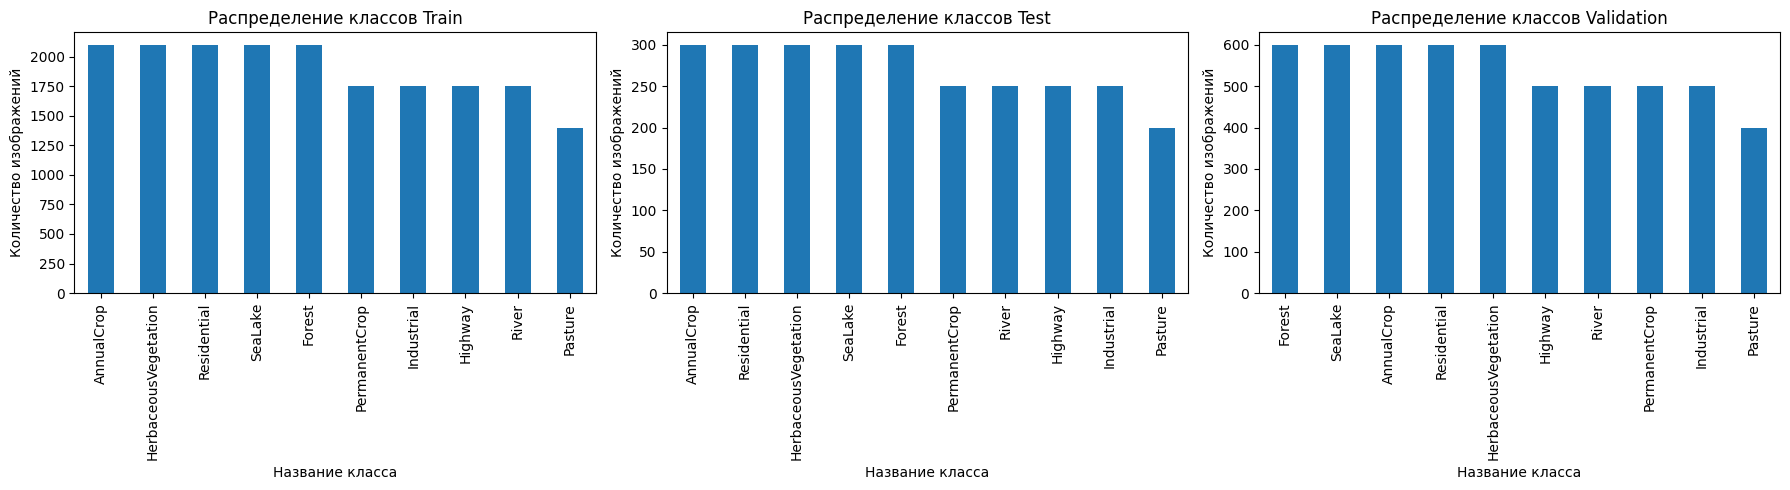

In [ ]:
import matplotlib.pyplot as plt

train_class_counts = train_data['ClassName'].value_counts()
test_class_counts = test_data['ClassName'].value_counts()
validation_class_counts = validation_data['ClassName'].value_counts()

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

train_class_counts.plot(kind='bar', ax=axes[0], title='Распределение классов Train')
axes[0].set_xlabel('Название класса')
axes[0].set_ylabel('Количество изображений')

test_class_counts.plot(kind='bar', ax=axes[1], title='Распределение классов Test')
axes[1].set_xlabel('Название класса')
axes[1].set_ylabel('Количество изображений')

validation_class_counts.plot(kind='bar', ax=axes[2], title='Распределение классов Validation')
axes[2].set_xlabel('Название класса')
axes[2].set_ylabel('Количество изображений')

plt.tight_layout()
plt.show()

Для дальнейшего анализа был выбран тренировочный набор данных, так как он содержит наибольшее количество изображений среди всех трех наборов (около 2000+ изображений). Это позволяет более детально изучить структуру данных, выявить редкие классы и провести более глубокий анализ на предмет пропусков и выбросов. Также использование тренировочного набора даст нам больше возможностей для обучения модели и лучшего понимания данных перед использованием тестового и валидационного наборов для проверки производительности модели.

In [ ]:
import pandas as pd
import os
from PIL import Image, UnidentifiedImageError

train_csv_path = os.path.join(sat_path, 'train.csv')
train_data = pd.read_csv(train_csv_path)

print("Информация о train данных:")
print(train_data.info())

missing_values = train_data.isnull().sum()
print(f"Отсутствующие значения:\n{missing_values}")

def load_image(image_path):
  with open(image_path, 'rb') as f:
      img = Image.open(f)
      img.verify()
      return img

train_images = train_data['Filename'].apply(lambda x: os.path.join(sat_path, x))
image_sizes = []

for image_path in train_images:
  img = load_image(image_path)
  if img: image_sizes.append(img.size)
  else: continue

image_sizes_df = pd.DataFrame(image_sizes, columns=['width', 'height'])
print(f"Минимальный размер изображений {image_sizes_df.min()}")
print(f"Максимальный размер изображений: {image_sizes_df.max()}")

Информация о train данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18900 entries, 0 to 18899
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  18900 non-null  int64 
 1   Filename    18900 non-null  object
 2   Label       18900 non-null  int64 
 3   ClassName   18900 non-null  object
dtypes: int64(2), object(2)
memory usage: 590.8+ KB
None
Отсутствующие значения:
Unnamed: 0    0
Filename      0
Label         0
ClassName     0
dtype: int64
Минимальный размер изображений width     64
height    64
dtype: int64
Максимальный размер изображений: width     64
height    64
dtype: int64


Данные показывают, что изображения в наборе EuroSAT имеют одинаковый размер 64x64 пикселей, соответствуя описанию набора данных. В train_data отсутствуют пропуски во всех колонках (Unnamed: 0, Filename, Label, ClassName). Это свидетельствует о хорошем качестве данных и предсказуемости для дальнейших задач классификации. Все изображения в наборе имеют одинаковый размер, что упрощает их обработку в дальнейшем.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
from PIL import Image
import os

def load_image(image_path):
  try:
    img = Image.open(image_path)
    img = img.convert('RGB')
    return np.array(img)
  except: return None

image_sizes = []
X = []
for filename in train_data['Filename']:
  img = load_image(os.path.join(sat_path, filename))
  if img is not None:
    X.append(img.flatten())  # преобразование изображения в плоский массив
    image_sizes.append(img.size)
  else: continue  # пропуск поврежденные изображения

# Нормализация данных
X = np.array(X) / 255.0  # приведение значений пикселей к диапазону [0, 1]

# Разделение на тренировочную и тестовую выборки
y = train_data['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Создание и обучение модели
model_rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
model_rf.fit(X_train, y_train)

# Прогнозирование и оценка модели
y_pred = model_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность: {accuracy}")
print(f"Классификационный отчет:\n{classification_report(y_test, y_pred)}")
print(f"Матрица ошибок:\n{confusion_matrix(y_test, y_pred)}")

Точность: 0.6185185185185185
Классификационный отчет:
              precision    recall  f1-score   support

           0       0.55      0.65      0.59       637
           1       0.76      0.89      0.82       627
           2       0.61      0.42      0.50       637
           3       0.52      0.17      0.26       558
           4       0.70      0.87      0.78       521
           5       0.66      0.75      0.70       398
           6       0.42      0.30      0.35       497
           7       0.44      0.67      0.53       632
           8       0.56      0.63      0.59       533
           9       0.93      0.81      0.87       630

    accuracy                           0.62      5670
   macro avg       0.62      0.62      0.60      5670
weighted avg       0.62      0.62      0.60      5670

Матрица ошибок:
[[412   7  25  17  16  20  34  51  44  11]
 [  0 561   2   0   0  30   0   6  11  17]
 [ 60  13 267  11  26  21  89 120  29   1]
 [ 66  30  20  95  33  32  23 136 122   1]

Модель случайного леса показала точность 61.85% на тестовой выборке. Классификационный отчет демонстрирует разнообразные результаты по классам. Высокие значения точности и полноты наблюдаются для классов 1 (результат 0.82 по f1-score) и 9 (0.87 по f1-score), в то время как для класса 3 (например, Industrial) значения значительно ниже, с f1-score 0.26, что указывает на низкую точность в предсказаниях этого класса.

Матрица ошибок показывает, что модель допускает значительные ошибки, особенно для классов с меньшим количеством примеров (например, класс 3). Хотя модель хорошо предсказывает несколько классов, она имеет проблемы с классификацией некоторых, что видно по высоким числам ошибок в соответствующих строках матрицы.

In [ ]:
import pandas as pd
import numpy as np
import os
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def load_images(filenames, image_dir):
  images = []
  for filename in filenames:
    img = load_img(os.path.join(image_dir, filename), target_size=(64, 64))
    img_array = img_to_array(img)
    images.append(img_array)
  return np.array(images)

# Подготовка данных
X = load_images(train_data['Filename'], sat_path)
y = to_categorical(train_data['Label'], num_classes=10)

# Деление на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Нормализация данных
X_train = X_train / 255.0  # приведение значений пикселей к диапазону [0, 1]
X_test = X_test / 255.0

# Создаем модель CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Компиляция модели
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Обучение модели
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Оценка модели на тестовой выборке
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Точность на тестовой выборке: {test_acc}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
378/378 ━━━━━━━━━━━━━━━━━━━━ 74s 191ms/step - accuracy: 0.3556 - loss: 1.6458 - val_accuracy: 0.5549 - val_loss: 1.3407
Epoch 2/10
378/378 ━━━━━━━━━━━━━━━━━━━━ 78s 182ms/step - accuracy: 0.6302 - loss: 1.0115 - val_accuracy: 0.6944 - val_loss: 0.8572
Epoch 3/10
378/378 ━━━━━━━━━━━━━━━━━━━━ 73s 194ms/step - accuracy: 0.7002 - loss: 0.8458 - val_accuracy: 0.6911 - val_loss: 0.8732
Epoch 4/10
378/378 ━━━━━━━━━━━━━━━━━━━━ 78s 184ms/step - accuracy: 0.7365 - loss: 0.7273 - val_accuracy: 0.7116 - val_loss: 0.7786
Epoch 5/10
378/378 ━━━━━━━━━━━━━━━━━━━━ 69s 183ms/step - accuracy: 0.7832 - loss: 0.6056 - val_accuracy: 0.7655 - val_loss: 0.6352
Epoch 6/10
378/378 ━━━━━━━━━━━━━━━━━━━━ 68s 179ms/step - accuracy: 0.8084 - loss: 0.5311 - val_accuracy: 0.7748 - val_loss: 0.6272
Epoch 7/10
378/378 ━━━━━━━━━━━━━━━━━━━━ 81s 176ms/step - accuracy: 0.8449 - loss: 0.4456 - val_accuracy: 0.7851 - val_loss: 0.6006
Epoch 8/10
378/378 ━━━━━━━━━━━━━━━━━━━━ 68s 180ms/step - accuracy: 0.8544 - loss: 0

Модель сверточной нейронной сети (CNN) обучалась в течение 10 эпох. Точность на тренировочной выборке постепенно увеличивалась от 35.56% на первой эпохе до 89.40% на последней. Валидационная точность также демонстрировала стабильный рост, достигнув 79.99% к десятой эпохе. На тестовой выборке модель показала точность 81.16%, что свидетельствует о хорошем качестве классификации, несмотря на некоторую разницу между тренировочной и тестовой точностью.

Процесс обучения характеризуется улучшением значений как точности, так и потерь, что указывает на успешное обучение модели. Хотя точность тестовой выборки несколько ниже, чем на обучающей, результаты все же демонстрируют высокую способность модели к обобщению на новых данных.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

print(f"Точность: {accuracy_score(y_test, y_pred_knn)}")
print(f"Классификационный отчет::\n{classification_report(y_test, y_pred_knn)}")
print(f"Матрица ошибок:\n{confusion_matrix(y_test, y_pred_knn)}")

Точность: 0.33386243386243386
Классификационный отчет::
              precision    recall  f1-score   support

           0       0.40      0.59      0.48       637
           1       0.65      0.49      0.56       627
           2       0.29      0.61      0.39       637
           3       0.19      0.01      0.02       558
           4       1.00      0.01      0.01       521
           5       0.43      0.30      0.35       398
           6       0.15      0.01      0.02       497
           7       0.25      0.01      0.02       632
           8       0.65      0.11      0.19       533
           9       0.26      0.98      0.41       630

    accuracy                           0.33      5670
   macro avg       0.43      0.31      0.24      5670
weighted avg       0.42      0.33      0.25      5670

Матрица ошибок:
[[379   3 143   3   0  13   4   0   8  84]
 [  0 308   0   0   0   3   0   0   0 316]
 [ 40  20 391   1   0   7   2   0   4 172]
 [118  29 156   7   0  42   5   0  13 18

Модель K-ближайших соседей (KNN) показала низкую точность на тестовой выборке — 33.39%. Классификационный отчет демонстрирует высокие проблемы в предсказаниях для большинства классов, за исключением класса 9, для которого модель имеет высокую точность (0.98 по recall), но низкие результаты по другим меткам.

Матрица ошибок подтверждает эти выводы: модель часто ошибается в классификации, особенно для классов 3, 4 и 7, где наблюдаются большие ошибки, с множественными ошибочными предсказаниями на другие классы. В целом, использование KNN для этой задачи оказалось неэффективным, что может быть связано с характеристиками данных и выбранными параметрами модели.

In [ ]:
# Импорт библиотек
import numpy as np
import os
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
def extract_features(filenames, image_dir, model, batch_size=32):
    images = []
    for filename in filenames:
        img = load_img(os.path.join(image_dir, filename), target_size=(64, 64))
        img_array = img_to_array(img)
        images.append(img_array)

    images = np.array(images) / 255.0  # нормализация

    # Прогон через модель в батчах
    features = model.predict(images, batch_size=batch_size, verbose=0)
    return features.reshape(features.shape[0], -1)  # Преобразуем в двумерный массив

In [ ]:
image_dir = sat_path  # путь к папке с изображениями

# Загрузка предобученной модели VGG16 без классификационного слоя
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

X_features = extract_features(train_data['Filename'], image_dir, base_model)
y = train_data['Label']

X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.3, random_state=42)

# Random Forest
print("Обучение модели Random Forest...")
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print(f"Точность Random Forest: {accuracy_score(y_test, y_pred_rf)}")
print(f"Классификационный отчет Random Forest:\n{classification_report(y_test, y_pred_rf)}")
print(f"Матрица ошибок Random Forest:\n{confusion_matrix(y_test, y_pred_rf)}")

Обучение модели Random Forest...
Точность Random Forest: 0.7954144620811288
Классификационный отчет Random Forest:
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       637
           1       0.89      0.90      0.90       627
           2       0.77      0.78      0.78       637
           3       0.69      0.57      0.62       558
           4       0.84      0.91      0.87       521
           5       0.68      0.72      0.70       398
           6       0.67      0.63      0.65       497
           7       0.85      0.90      0.88       632
           8       0.70      0.63      0.67       533
           9       0.96      0.92      0.94       630

    accuracy                           0.80      5670
   macro avg       0.78      0.79      0.78      5670
weighted avg       0.79      0.80      0.79      5670

Матрица ошибок Random Forest:
[[570   2   0  17   0  14  14   0  15   5]
 [  2 566  14   0   0  30   0   0   4  11]
 [  2  24 

Модель Random Forest показала отличные результаты с точностью 79.54% на тестовой выборке. Классификационный отчет показывает хорошую производительность, особенно для классов 1, 9 и 7, где значения precision и recall высокие, что подтверждается высокой точностью предсказания для этих классов. Однако, для классов 3 и 5 точность значительно ниже, что видно из их более низких значений precision и recall.

Матрица ошибок показывает, что большинство ошибок приходится на небольшие количества предсказаний в ошибочных классах. Например, класс 3 имеет значительное количество ошибок в предсказаниях других классов, но общая модель показывает сбалансированную работу для большинства меток. В целом, Random Forest демонстрирует хорошее сочетание точности и стабильности, особенно при использовании извлечённых признаков с помощью предобученной модели VGG16.

In [ ]:
# CNN
print("Обучение простой нейросети на сверточных характеристиках...")
cnn_model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(len(np.unique(y)), activation='softmax')
])
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = cnn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Оценка модели CNN
test_loss, test_acc = cnn_model.evaluate(X_test, y_test)
print(f"Точность CNN: {test_acc}")

Обучение простой нейросети на сверточных характеристиках...
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


331/331 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.5213 - loss: 1.3045 - val_accuracy: 0.7683 - val_loss: 0.6572
Epoch 2/10
331/331 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.7502 - loss: 0.7058 - val_accuracy: 0.8250 - val_loss: 0.5431
Epoch 3/10
331/331 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7835 - loss: 0.6210 - val_accuracy: 0.8254 - val_loss: 0.5042
Epoch 4/10
331/331 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8055 - loss: 0.5705 - val_accuracy: 0.8398 - val_loss: 0.4689
Epoch 5/10
331/331 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8077 - loss: 0.5447 - val_accuracy: 0.8367 - val_loss: 0.4895
Epoch 6/10
331/331 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8312 - loss: 0.4904 - val_accuracy: 0.8280 - val_loss: 0.4850
Epoch 7/10
331/331 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8315 - loss: 0.4841 - val_accuracy: 0.8488 - val_loss: 0.4374
Epoch 8/10
331/331 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8495 - loss: 0.4390 - val_accuracy: 0.8545 - 

Модель CNN, обученная на извлечённых сверточных признаках, продемонстрировала отличные результаты с точностью 85.71% на тестовой выборке. В процессе обучения нейросеть постепенно улучшала свои результаты, начиная с точности 52.13% на первой эпохе до 85.71% в финале. Этот прогресс свидетельствует о хорошем обучении модели, стабилизировавшейся к 10-й эпохе.

Важно отметить, что модель использует dropout слой для регуляризации, что помогает предотвратить переобучение, а также достигает хорошей производительности на валидационных данных. В целом, CNN с использованием сверточных признаков из VGG16 показывает значительное улучшение по сравнению с традиционными методами классификации, такими как Random Forest и KNN.

In [ ]:
# KNN
print("Обучение модели KNN...")
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_flat, y_train)
y_pred_knn = knn_model.predict(X_test_flat)
print(f"Точность KNN: {accuracy_score(y_test, y_pred_knn)}")
print(f"Классификационный отчет KNN:\n{classification_report(y_test, y_pred_knn)}")
print(f"Матрица ошибок KNN:\n{confusion_matrix(y_test, y_pred_knn)}")

Обучение модели KNN...
Точность KNN: 0.7758377425044092
Классификационный отчет KNN:
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       637
           1       0.75      0.97      0.85       627
           2       0.74      0.78      0.76       637
           3       0.69      0.61      0.65       558
           4       0.89      0.80      0.84       521
           5       0.59      0.63      0.61       398
           6       0.64      0.67      0.66       497
           7       0.85      0.89      0.87       632
           8       0.75      0.58      0.65       533
           9       0.97      0.88      0.92       630

    accuracy                           0.78      5670
   macro avg       0.77      0.76      0.76      5670
weighted avg       0.78      0.78      0.77      5670

Матрица ошибок KNN:
[[534   7   0  25   0  20  23   0  20   8]
 [  0 607   4   3   0   5   0   0   2   6]
 [  1  46 496   9   0  14  41  22   7   1]
 [ 33  

Модель KNN, обученная на признаках, извлечённых с помощью VGG16, показала точность 77,6% на тестовой выборке. Это результат достаточно хороший, однако он уступает точности нейросети, использующей те же признаки, которая достигла 85,7%. KNN хорошо справляется с классификацией некоторых классов, таких как класс 1 и класс 9, показывая высокую точность и отзыв, но для других классов, например, для класса 5, результаты оставляют желать лучшего. Ошибки чаще всего происходят при классификации схожих между собой классов, что также подтверждается матрицей ошибок.

По сравнению с CNN, модель KNN продемонстрировала более низкие результаты, что связано с особенностями работы KNN, чувствительного к расстояниям между объектами, и ограничениями в обработке сложных зависимостей в данных. Несмотря на это, KNN остаётся полезным инструментом и может служить хорошей базовой моделью для сравнений с более сложными методами, такими как нейросети.

В ходе работы мы применили метод извлечения признаков с использованием предобученной модели VGG16, которая прошла без классификационного слоя, что позволило нам получить мощные сверточные характеристики изображений. Эти характеристики затем использовались для обучения нескольких классификационных моделей, включая Random Forest, KNN и простую нейросеть.

Результаты показали, что использование сверточных признаков, полученных с помощью VGG16, значительно улучшает производительность моделей. Модель Random Forest, обученная на этих признаках, достигла точности около 79%, а модель нейросети продемонстрировала ещё более высокую точность — 85,7%. Модель KNN также показала достойный результат с точностью 77,6%, несмотря на свою относительную простоту по сравнению с более сложными методами.

Таким образом, использование предобученной сверточной нейросети в качестве основы для извлечения признаков позволило улучшить классификацию и извлечь более информативные характеристики, чем если бы мы использовали исходные пиксели изображений. Это демонстрирует эффективность использования трансферного обучения для задач классификации, где глубокие нейросети могут служить мощным инструментом для автоматического извлечения признаков и улучшения качества моделей.






